In [1]:
!pip install ta

In [2]:
import warnings
warnings.filterwarnings("ignore")

import ta
import scipy
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
from math import sqrt
import scipy.stats as ss
import statsmodels as smt
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
start_date = datetime(2020,1,1)
end_date = datetime(2023,4,28)

LULU = yf.download('LULU', start_date , end_date)
LULU.reset_index(inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [4]:
LULU

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,232.899994,233.470001,231.770004,233.419998,233.419998,1449300
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900
...,...,...,...,...,...,...,...
831,2023-04-21,376.709991,378.089996,374.279999,377.799988,377.799988,1007700
832,2023-04-24,378.760010,384.250000,377.829987,381.369995,381.369995,1504000
833,2023-04-25,378.220001,380.390015,372.260010,372.809998,372.809998,1784300
834,2023-04-26,373.779999,375.209991,371.859985,372.940002,372.940002,1019700


In [6]:
# Calculate additional features
LULU["SMA_20"] = ta.trend.sma_indicator(LULU["Close"], window = 20, fillna = True)
LULU["SMA_50"] = ta.trend.sma_indicator(LULU["Close"], window = 50, fillna = True)
LULU["SMA_10"] = ta.trend.sma_indicator(LULU["Close"], window = 10, fillna = True)
LULU["SMA_30"] = ta.trend.sma_indicator(LULU["Close"], window = 30, fillna = True)

LULU["EMA_12"] = ta.trend.ema_indicator(LULU["Close"], window = 12, fillna = True)
LULU["EMA_26"] = ta.trend.ema_indicator(LULU["Close"], window = 26, fillna = True)
LULU["EMA_40"] = ta.trend.ema_indicator(LULU["Close"], window = 40, fillna = True)
LULU["EMA_60"] = ta.trend.ema_indicator(LULU["Close"], window = 60, fillna = True)

LULU["MACD"] = ta.trend.macd(LULU["Close"], fillna = True)
LULU["RSI"] = ta.momentum.rsi(LULU["Close"], fillna = True)

In [7]:
LULU

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_10,SMA_30,EMA_12,EMA_26,EMA_40,EMA_60,MACD,RSI
0,2020-01-02,232.899994,233.470001,231.770004,233.419998,233.419998,1449300,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,0.000000,100.000000
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400,233.029999,233.029999,233.029999,233.029999,233.299998,233.362220,233.381949,233.394424,-0.062222,0.000000
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700,233.829997,233.829997,233.829997,233.829997,233.627690,233.515389,233.481854,233.461164,0.112301,79.390230
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900,233.797497,233.797497,233.797497,233.797497,233.638814,233.529063,233.492495,233.468995,0.109750,51.884166
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900,234.491998,234.491998,234.491998,234.491998,234.197459,233.806170,233.676764,233.593618,0.391288,72.815353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2023-04-21,376.709991,378.089996,374.279999,377.799988,377.799988,1007700,359.424998,328.292998,369.085999,338.744667,366.664845,351.919274,342.769134,335.911445,14.745571,76.982461
832,2023-04-24,378.760010,384.250000,377.829987,381.369995,381.369995,1504000,362.820998,329.711398,370.885999,341.581666,368.927176,354.100809,344.652102,337.401890,14.826367,78.530605
833,2023-04-25,378.220001,380.390015,372.260010,372.809998,372.809998,1784300,365.600497,330.979598,371.585999,344.245333,369.524533,355.486675,346.025658,338.562811,14.037858,66.909909
834,2023-04-26,373.779999,375.209991,371.859985,372.940002,372.940002,1019700,368.231998,332.096798,372.525998,346.839999,370.049990,356.779514,347.338553,339.689932,13.270476,66.989802


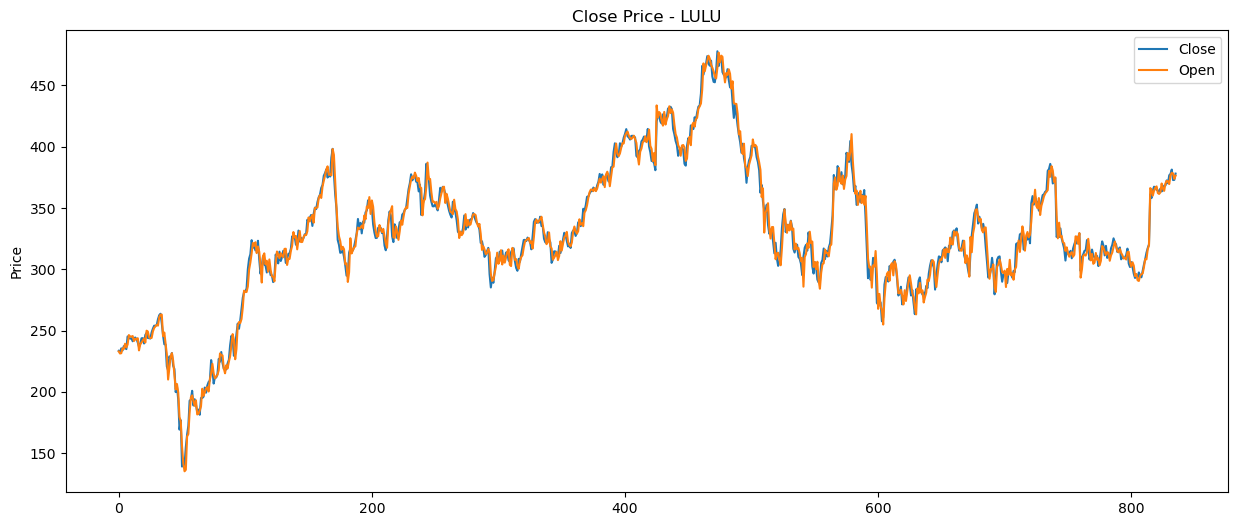

In [8]:
LULU[['Close', 'Open']].plot(figsize=(15,6))
plt.title('Close Price - LULU')
plt.ylabel('Price')
plt.show()

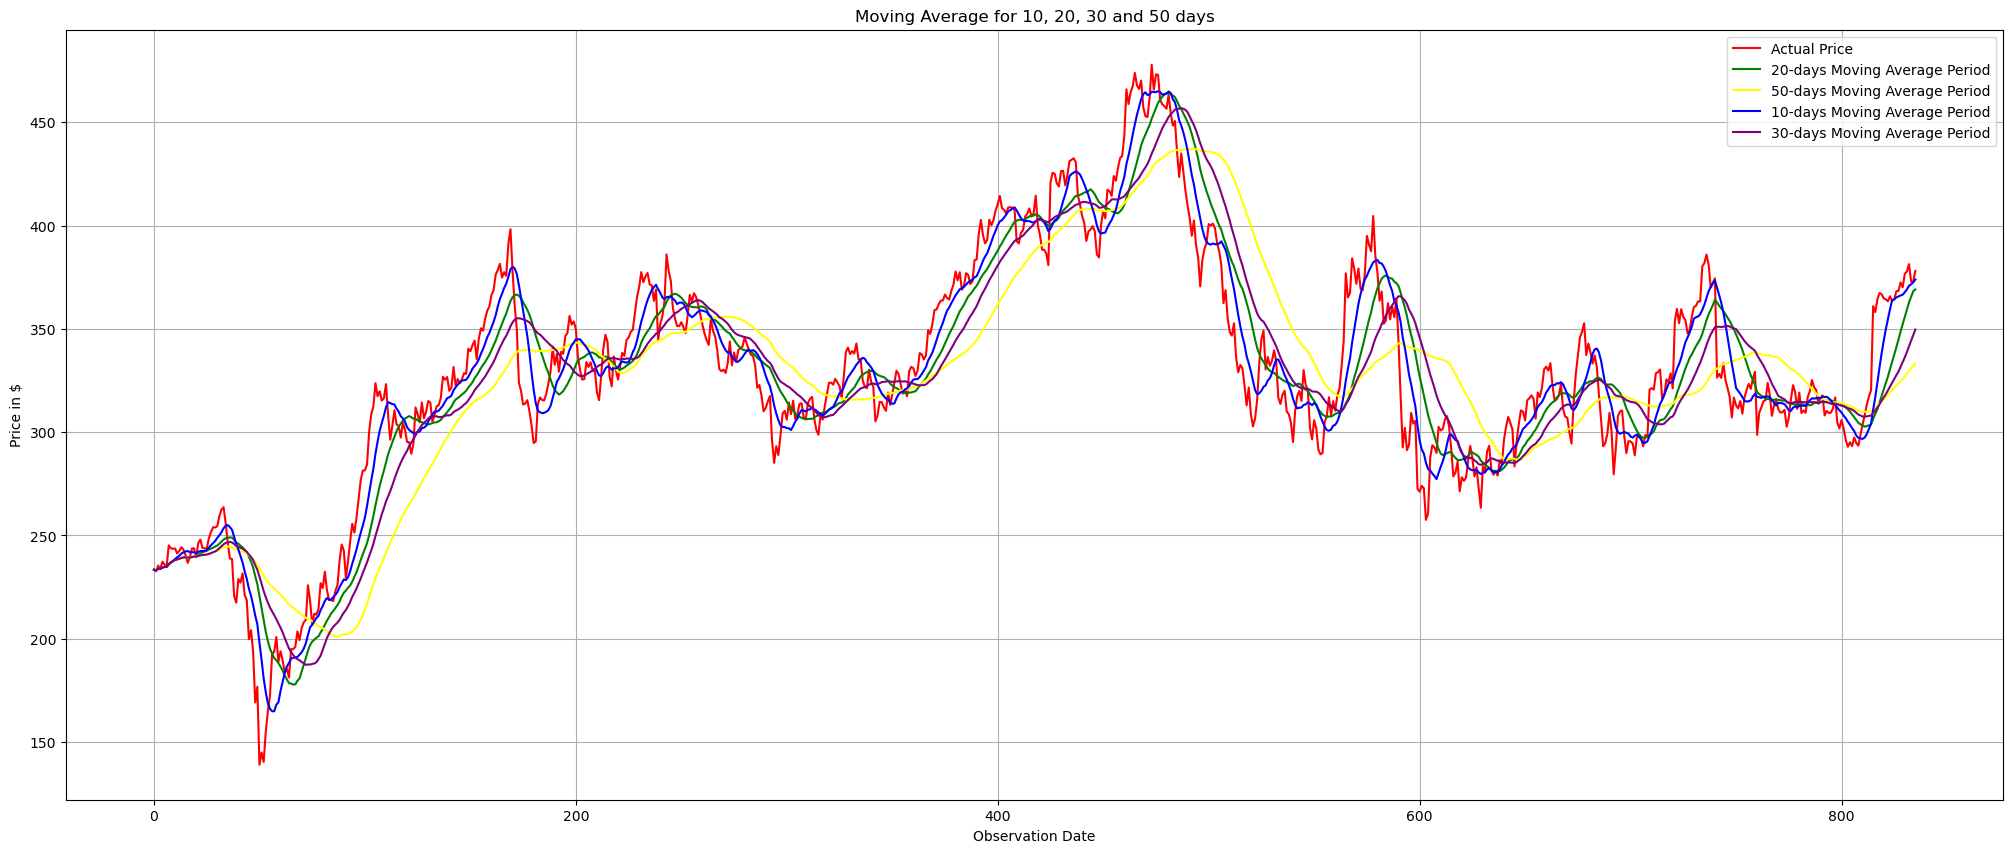

In [9]:
fig = plt.figure(figsize = (25,10))

# plot close price, short-term and long-term moving averages
LULU['Close'].plot(label='Actual Price', color = 'red')
LULU['SMA_20'].plot(label = '20-days Moving Average Period', color = 'green')
LULU['SMA_50'].plot(label = '50-days Moving Average Period', color = 'yellow')
LULU['SMA_10'].plot(label = '10-days Moving Average Period', color = 'blue')
LULU['SMA_30'].plot(label = '30-days Moving Average Period', color = 'purple')

plt.ylabel('Price in $')
plt.xlabel('Observation Date')
plt.title('Moving Average for 10, 20, 30 and 50 days')
plt.legend()
plt.grid()
plt.show()

fig.savefig('SMA_Plot.png')

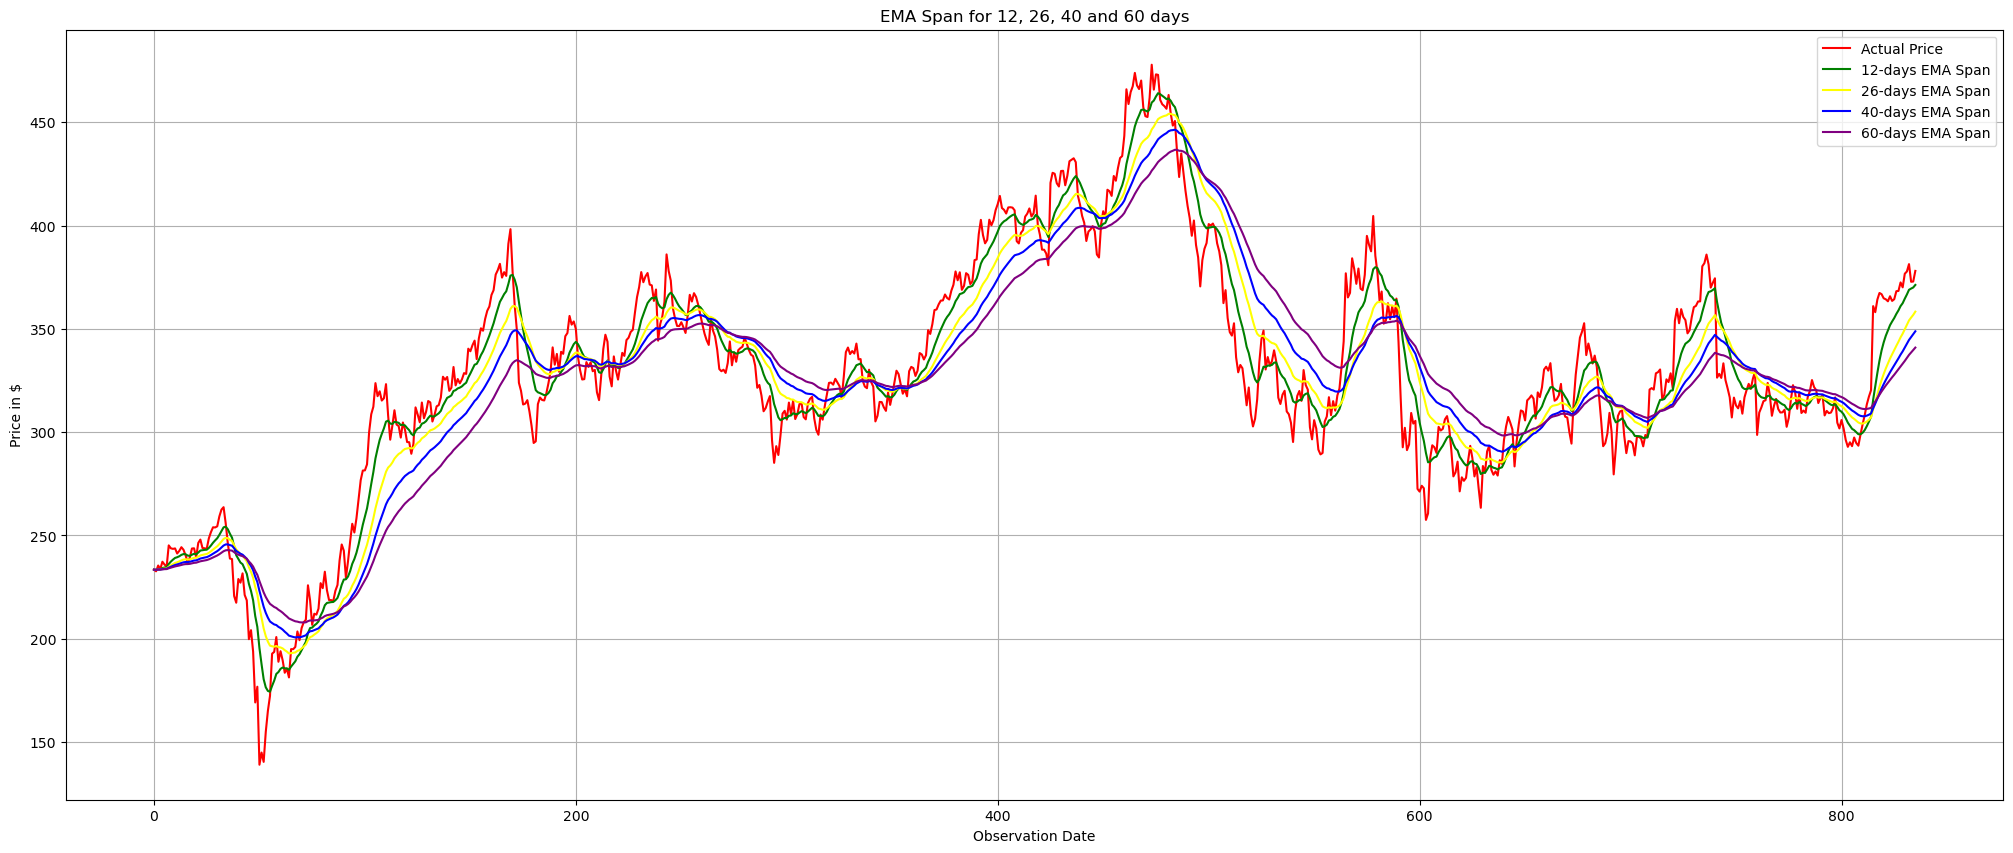

In [10]:
fig = plt.figure(figsize = (25,10))

# plot close price, short-term and long-term moving averages
LULU['Close'].plot(label='Actual Price', color = 'red')
LULU['EMA_12'].plot(label = '12-days EMA Span', color = 'green')
LULU['EMA_26'].plot(label = '26-days EMA Span', color = 'yellow')
LULU['EMA_40'].plot(label = '40-days EMA Span', color = 'blue')
LULU['EMA_60'].plot(label = '60-days EMA Span', color = 'purple')

plt.ylabel('Price in $')
plt.xlabel('Observation Date')
plt.title('EMA Span for 12, 26, 40 and 60 days')
plt.legend()
plt.grid()
plt.show()

fig.savefig('EMA_Plot.png')

In [12]:
LULU['SMA_Signal'] = 0.0
LULU['SMA_Signal'] = np.where(LULU['SMA_20'] > LULU['SMA_50'], 1.0, 0.0)

LULU['SMA_Position'] = LULU['SMA_Signal'].diff()
# display first few rows
LULU.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_10,SMA_30,EMA_12,EMA_26,EMA_40,EMA_60,MACD,RSI,SMA_Signal,SMA_Position
0,2020-01-02,232.899994,233.470001,231.770004,233.419998,233.419998,1449300,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,233.419998,0.000000,100.000000,0.0,NaN
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400,233.029999,233.029999,233.029999,233.029999,233.299998,233.362220,233.381949,233.394424,-0.062222,0.000000,0.0,0.0
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700,233.829997,233.829997,233.829997,233.829997,233.627690,233.515389,233.481854,233.461164,0.112301,79.390230,0.0,0.0
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900,233.797497,233.797497,233.797497,233.797497,233.638814,233.529063,233.492495,233.468995,0.109750,51.884166,0.0,0.0
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900,234.491998,234.491998,234.491998,234.491998,234.197459,233.806170,233.676764,233.593618,0.391288,72.815353,0.0,0.0


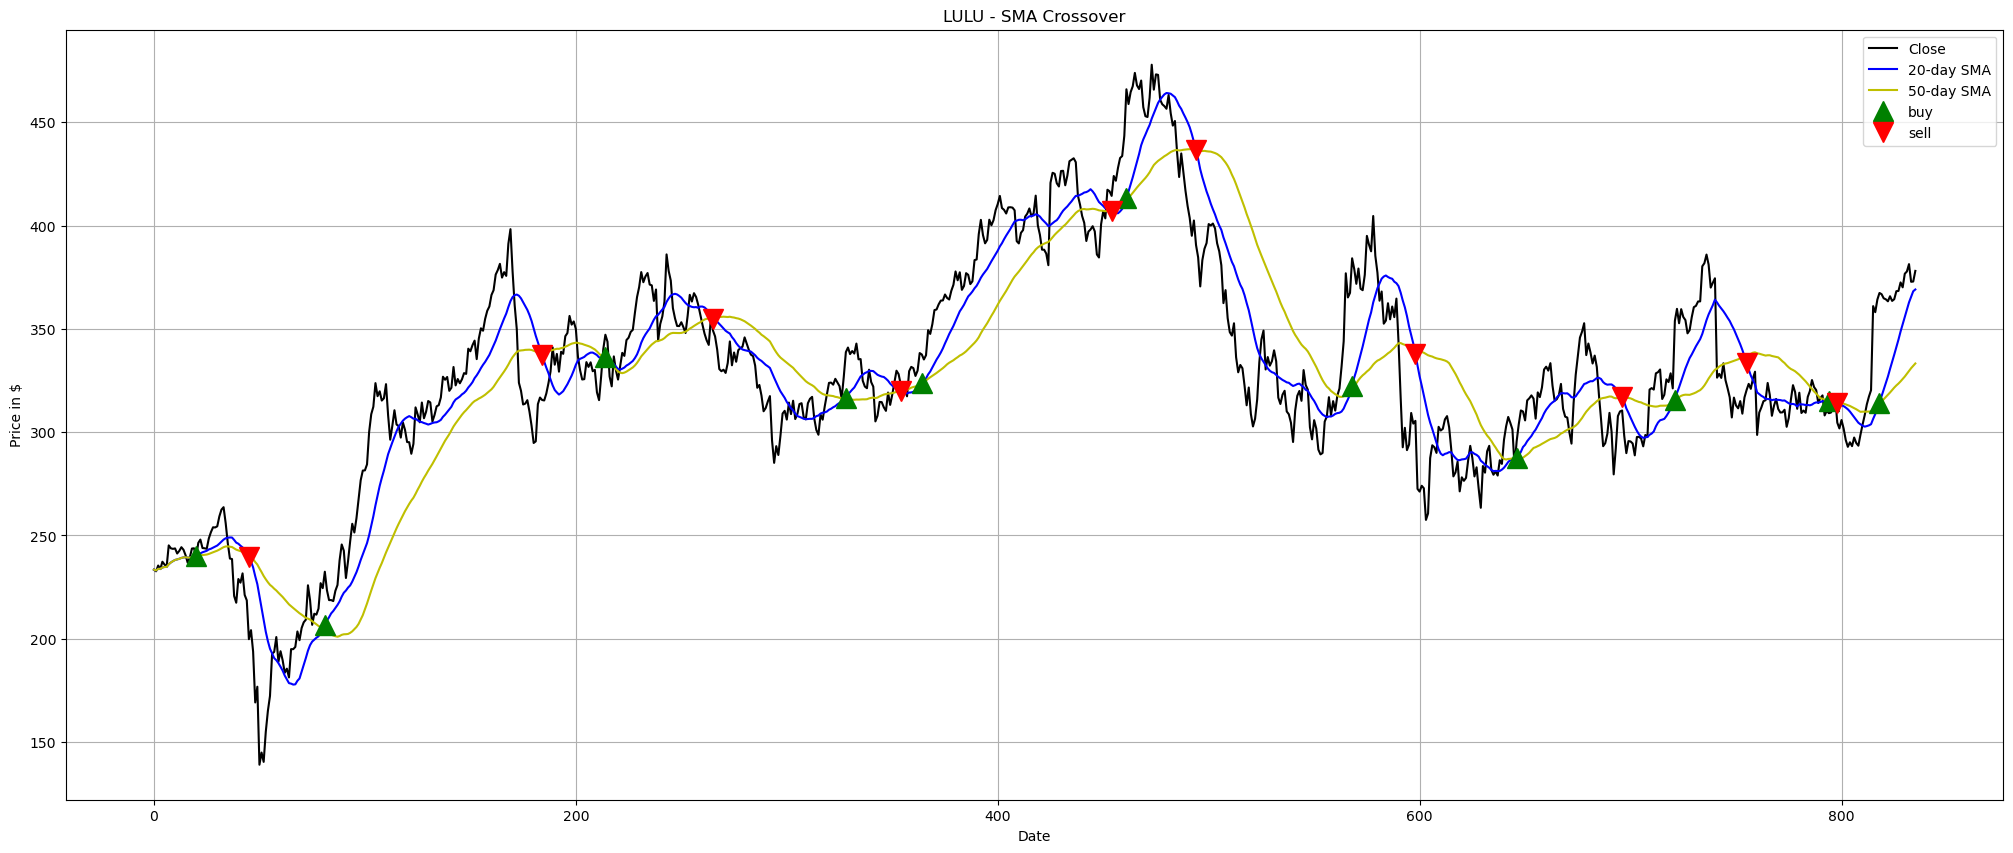

In [13]:
fig = plt.figure(figsize = (25,10))

# plot close price, short-term and long-term moving averages
LULU['Close'].plot(color = 'k', label= 'Close')
LULU['SMA_20'].plot(color = 'b',label = '20-day SMA')
LULU['SMA_50'].plot(color = 'y',label = '50-day SMA')

# plot ‘buy’ signals
plt.plot(LULU[LULU['SMA_Position'] == 1].index,
         LULU['SMA_20'][LULU['SMA_Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')

# plot ‘sell’ signals
plt.plot(LULU[LULU['SMA_Position'] == -1].index,
         LULU['SMA_20'][LULU['SMA_Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.title('LULU - SMA Crossover')
plt.legend()
plt.grid()
plt.show()

fig.savefig('SMA_Crossover_Plot.png')

In [14]:
# Create a new column 'Signal' such that if 12-day EMA is greater than 26-day EMA then set Signal as 1 else 0
LULU['EMA_Signal'] = 0.0
LULU['EMA_Signal'] = np.where(LULU['EMA_12'] > LULU['EMA_26'], 1.0, 0.0)
LULU['EMA_Position'] = LULU['EMA_Signal'].diff()

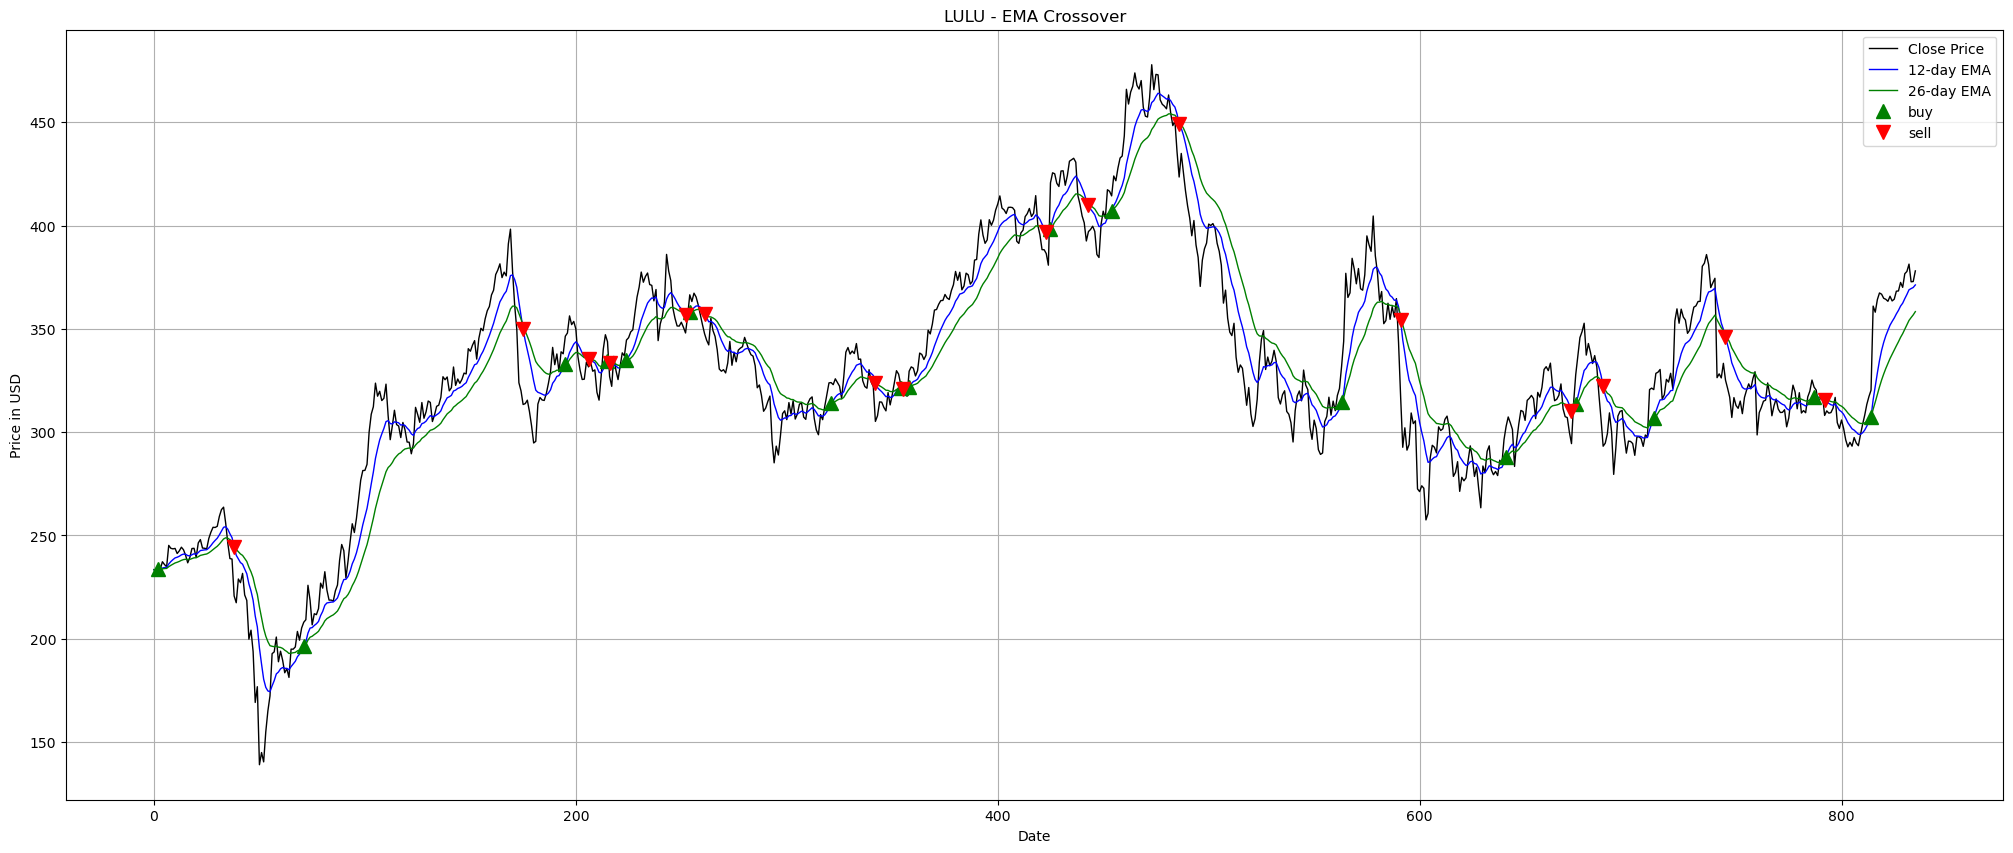

In [17]:
fig = plt.figure(figsize = (25,10))

LULU['Close'].plot(color = 'k', lw = 1, label = 'Close Price')
LULU['EMA_12'].plot(color = 'b', lw = 1, label = '12-day EMA')
LULU['EMA_26'].plot(color = 'g', lw = 1, label = '26-day EMA')

plt.plot(LULU[LULU['EMA_Position'] == 1].index,
         LULU['EMA_12'][LULU['EMA_Position'] == 1],
         '^', markersize = 10, color = 'g', label = 'buy')

plt.plot(LULU[LULU['EMA_Position'] == -1].index,
         LULU['EMA_12'][LULU['EMA_Position'] == -1],
         'v', markersize = 10, color = 'r', label = 'sell')

plt.ylabel('Price in USD')
plt.xlabel('Date')
plt.title('LULU - EMA Crossover')
plt.legend()
plt.grid()
plt.show()

fig.savefig('EMA_Crossover_Plot.png')

In [21]:
# Assuming 'Close' and 'EMA_12' are columns in your DataFrame
close_values = LULU['Close'].values
ema_12_values = LULU['EMA_12'].values

# Calculate mean squared error
mse = mean_squared_error(close_values, ema_12_values)

# Calculate root mean squared error
rmse = sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 13.816724453914091


In [22]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [23]:
x = LULU['Close'].tolist()
y = LULU['EMA_12'].tolist()

rsquared(x, y)

0.9404661487397136

In [24]:
for index, row in LULU.iterrows():
    if LULU.loc[index,'Close'] > LULU.loc[index,'EMA_12']:
        LULU.loc[index,'EMA_12_Signal'] = 1
    elif LULU.loc[index,'Close'] < LULU.loc[index,'EMA_12']:
        LULU.loc[index,'EMA_12_Signal'] = -1
    else:
        LULU.loc[index,'EMA_12_Signal'] = 0

In [26]:
LULU.dropna(axis=0,how='any',inplace=True)
LULU.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_10,...,EMA_26,EMA_40,EMA_60,MACD,RSI,SMA_Signal,SMA_Position,EMA_Signal,EMA_Position,EMA_12_Signal
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400,233.029999,233.029999,233.029999,...,233.362220,233.381949,233.394424,-0.062222,0.000000,0.0,0.0,0.0,0.0,-1.0
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700,233.829997,233.829997,233.829997,...,233.515389,233.481854,233.461164,0.112301,79.390230,0.0,0.0,1.0,1.0,1.0
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900,233.797497,233.797497,233.797497,...,233.529063,233.492495,233.468995,0.109750,51.884166,0.0,0.0,1.0,0.0,1.0
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900,234.491998,234.491998,234.491998,...,233.806170,233.676764,233.593618,0.391288,72.815353,0.0,0.0,1.0,0.0,1.0
5,2020-01-09,239.220001,239.470001,235.289993,235.899994,235.899994,1141300,234.726664,234.726664,234.726664,...,233.961268,233.785214,233.669237,0.498119,61.719349,0.0,0.0,1.0,0.0,1.0


In [27]:
LULU['EMA_12_Signal']= LULU['EMA_12_Signal'].shift(1)
LULU

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_10,...,EMA_26,EMA_40,EMA_60,MACD,RSI,SMA_Signal,SMA_Position,EMA_Signal,EMA_Position,EMA_12_Signal
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400,233.029999,233.029999,233.029999,...,233.362220,233.381949,233.394424,-0.062222,0.000000,0.0,0.0,0.0,0.0,NaN
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700,233.829997,233.829997,233.829997,...,233.515389,233.481854,233.461164,0.112301,79.390230,0.0,0.0,1.0,1.0,-1.0
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900,233.797497,233.797497,233.797497,...,233.529063,233.492495,233.468995,0.109750,51.884166,0.0,0.0,1.0,0.0,1.0
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900,234.491998,234.491998,234.491998,...,233.806170,233.676764,233.593618,0.391288,72.815353,0.0,0.0,1.0,0.0,1.0
5,2020-01-09,239.220001,239.470001,235.289993,235.899994,235.899994,1141300,234.726664,234.726664,234.726664,...,233.961268,233.785214,233.669237,0.498119,61.719349,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2023-04-21,376.709991,378.089996,374.279999,377.799988,377.799988,1007700,359.424998,328.292998,369.085999,...,351.919274,342.769134,335.911445,14.745571,76.982461,1.0,0.0,1.0,0.0,1.0
832,2023-04-24,378.760010,384.250000,377.829987,381.369995,381.369995,1504000,362.820998,329.711398,370.885999,...,354.100809,344.652102,337.401890,14.826367,78.530605,1.0,0.0,1.0,0.0,1.0
833,2023-04-25,378.220001,380.390015,372.260010,372.809998,372.809998,1784300,365.600497,330.979598,371.585999,...,355.486675,346.025658,338.562811,14.037858,66.909909,1.0,0.0,1.0,0.0,1.0
834,2023-04-26,373.779999,375.209991,371.859985,372.940002,372.940002,1019700,368.231998,332.096798,372.525998,...,356.779514,347.338553,339.689932,13.270476,66.989802,1.0,0.0,1.0,0.0,1.0


In [28]:
LULU['EMA_12_Signal'].value_counts()

 1.0    486
-1.0    348
Name: EMA_12_Signal, dtype: int64

In [30]:
initial_amt = 20000
total_shares = 30
initial_accountbalance = initial_amt
initial_shares = total_shares

print('Account balance ',initial_amt)
print('Initial number of shares owned ',total_shares)
ini_price = LULU.loc[1,'Close']
avg_price = LULU['Close'].mean()
initial_val = initial_amt + ini_price*total_shares
#initial amount+total_shares*ini_price

for index, row in LULU.iterrows():
    if LULU.loc[index,'EMA_12_Signal'] == 1:
        if (initial_amt - LULU.loc[index,'Close'])> 0 :
            initial_amt -= LULU.loc[index,'Close']
            avg_price = ((avg_price*total_shares)+LULU.loc[index,'Close'])/(total_shares+1)
            total_shares = total_shares + 1;
            LULU.loc[index,'Action'] = "Buy"
        else:
            LULU.loc[index,'Action'] = "Buy Alert"
    elif LULU.loc[index,'EMA_12_Signal'] == -1:
        if total_shares - 1 > 0 :
            LULU.loc[index,'Action'] = "Sell"
            avg_price = ((avg_price*total_shares)-LULU.loc[index,'Close'])/(total_shares-1)
            initial_amt += LULU.loc[index,'Close'];
            total_shares = total_shares - 1;
        else:
            LULU.loc[index,'Action'] = "Sell Alert"
    else:
        LULU.loc[index,'Action'] = "Hold"

print('----------------Signals Given During Day To Day Trade------------------------')
print(LULU.tail(10))
print('----------------Results-------------------------')
print('Balance left in Account',initial_amt)
print('Total Number of shares ',total_shares)
final_amt = initial_amt

Account balance  20000
Initial number of shares owned  30
----------------Signals Given During Day To Day Trade------------------------
          Date        Open        High         Low       Close   Adj Close  \
826 2023-04-14  364.000000  369.140015  363.859985  368.250000  368.250000   
827 2023-04-17  369.989990  373.410004  366.989990  368.380005  368.380005   
828 2023-04-18  372.100006  373.500000  369.529999  372.500000  372.500000   
829 2023-04-19  371.750000  374.059998  369.850006  370.119995  370.119995   
830 2023-04-20  369.529999  377.839996  369.070007  376.709991  376.709991   
831 2023-04-21  376.709991  378.089996  374.279999  377.799988  377.799988   
832 2023-04-24  378.760010  384.250000  377.829987  381.369995  381.369995   
833 2023-04-25  378.220001  380.390015  372.260010  372.809998  372.809998   
834 2023-04-26  373.779999  375.209991  371.859985  372.940002  372.940002   
835 2023-04-27  376.339996  379.149994  373.320007  378.079987  378.079987   

     

In [31]:
# Profit calculation
inital_share_worth = initial_shares * LULU.loc[min(LULU.index),'Close'] + initial_accountbalance

final_shares = total_shares
final_share_worth = final_shares * LULU.loc[max(LULU.index),'Close'] + final_amt

profit_percent = (final_share_worth - inital_share_worth)/inital_share_worth
print('Profit gained: ', profit_percent*100, '%')

Profit gained:  22.671163938803883 %
